<a href="https://colab.research.google.com/github/anjali-ii/Depression_Detection_from_speech/blob/main/Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the directory where your audio files are stored
base_dir = '/content/drive/My Drive/Audio'

In [4]:
pip install pydub

In [5]:
pip install pyworld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=865290 sha256=4cc5218d3086e9bdc19fab65c8013bbe771809bee387f3ee0cf4d7f37d6e016a
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
Successfully built pyworld


In [6]:
import os
import numpy as np
from pydub import AudioSegment
import librosa
import pandas as pd
import pyworld as pw
import matplotlib.pyplot as plt
import warnings

In [7]:
# Define parameters for feature extraction
frame_length = 0.050  # Frame length in seconds
hop_length = 0.030    # Hop length (frame shift) in seconds
n_mels = 36           # Number of Mel bands
fs = 16000

In [8]:
# Suppress UserWarning from librosa
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

In [9]:
pip install --upgrade librosa

In [10]:
pip install audioread

In [11]:
# Suppress the warning
warnings.filterwarnings('ignore', message='Deprecated as of librosa version 0.10.0.')

In [12]:
# Suppress the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

In [13]:
frame_features = []
participant_ids=[]
# Iterate over each audio file
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.m4a'):
            # Construct the path to the audio file
            audio_path = os.path.join(root, file)
            #print(f"Processing audio file: {audio_path}")

            # Load audio file
            audio, sr = librosa.load(audio_path, mono=True)

            # Resample to 16 kHz
            target_sr = 16000
            audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

            frame = audio_resampled.astype(np.double)
            f0, timeaxis = pw.harvest(frame, fs, frame_period=30)
            sp = pw.cheaptrick(frame, f0, timeaxis, fs)
            ap = pw.d4c(frame, f0, timeaxis,fs)
            ap_aggregated = np.mean(ap, axis=1)
            # Calculate Mel filter bank features
            mfb = pw.code_spectral_envelope(sp, fs, n_mels)

            # Ensure all arrays have the same number of frames
            min_frames = min(mfb.shape[0], f0.shape[0], ap_aggregated.shape[0])
            mfb = mfb[:min_frames]
            f0 = f0[:min_frames]
            ap_aggregated = ap_aggregated[:min_frames]

            # Standardization (Mean-variance normalization)
            f0_mean = np.mean(f0)
            f0_std = np.std(f0)
            f0_normalized = (f0 - f0_mean) / f0_std

            ap_aggregated_mean = np.mean(ap_aggregated)
            ap_aggregated_std = np.std(ap_aggregated)
            ap_aggregated_normalized = (ap_aggregated - ap_aggregated_mean) / ap_aggregated_std

            mel_filter_bank_mean = np.mean(mfb, axis=0)
            mel_filter_bank_std = np.std(mfb, axis=0)
            mel_filter_bank_normalized = (mfb - mel_filter_bank_mean) / mel_filter_bank_std

            # Append features to the list
            frame_features.append(np.concatenate([mel_filter_bank_normalized, f0_normalized[:, np.newaxis], ap_aggregated_normalized[:, np.newaxis]], axis=1))
            participant_ids.append(os.path.basename(root))

In [14]:
print(len(frame_features))
for i in range(len(frame_features)):
   a = frame_features[i]
   print(participant_ids[i])
print(len(participant_ids))

90
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P77
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P5
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P149
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P4
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P43
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
P15
90


In [ ]:
participant_ids=[]
# Iterate over each audio file
for root, dirs, files in os.walk(base_dir):
    for file in files:
      participant_ids.append(os.path.basename(root))
participant_ids

In [15]:
# Load severity scores from Excel sheet
file_path = '/content/drive/My Drive/PHQ.xlsx'
severity_scores_df = pd.read_excel(file_path)

In [16]:
# Initialize lists for scores and categories
scores = []
categories = []

# Iterate over each participant ID in p_id list
for p_id in participant_ids:
    # Find corresponding row in severity_scores_df
    row = severity_scores_df[severity_scores_df['P_id'] == p_id]

    # Check if participant ID exists in severity_scores_df
    if not row.empty:
        # Extract score and category
        score = row['Score'].iloc[0]  # Assuming 'Score' is the column containing scores
        category = row['Category'].iloc[0]  # Assuming 'Category' is the column containing categories

        # Append score and category to the respective lists
        scores.append(score)
        categories.append(category)
    else:
        # If participant ID not found, append None to scores and categories lists
        scores.append(None)
        categories.append(None)

# Check the first few elements of scores and categories lists
print(scores)
print(categories)


[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [17]:
import scipy.io
data={'Features':frame_features, 'P_id':participant_ids, 'Score':scores, 'Category':categories}
path="ap_f0_mfb_features.mat"
scipy.io.savemat(path,data)

In [18]:
df=scipy.io.loadmat(path)
df.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Features', 'P_id', 'Score', 'Category'])

In [91]:
features = np.hstack(df['Features'])
label1 = np.hstack(df['Score'])
label2 = np.hstack(df['Category'])

In [ ]:
print(label.shape)
print(features.shape)
for i in range(90):
  print(features[i].shape)
  print(label[i])

In [92]:
# Define the segment length
segment_length = 100  # Choose a suitable segment length based on your data

# Initialize lists to store segmented features and labels
segmented_features = []
segmented_label1 = []
segmented_label2 =[]

# Iterate over each audio clip
for i in range(len(features)):
    # Get the current audio clip and its corresponding label
    current_features = features[i]
    current_label1 = label1[i]
    current_label2 = label2[i]

    # Calculate the number of segments for this audio clip
    num_segments = len(current_features) // segment_length

    # Iterate over each segment
    for j in range(num_segments):
        # Calculate the start and end indices for the current segment
        start_idx = j * segment_length
        end_idx = start_idx + segment_length

        # Extract the segment of features and its corresponding label
        segment_features = current_features[start_idx:end_idx]

        # Append the segmented features and label to the lists
        segmented_features.append(segment_features)
        segmented_label1.append(current_label1)
        segmented_label2.append(current_label2)

# Convert the segmented features and labels to numpy arrays
segmented_features = np.array(segmented_features)
regression_label = np.array(segmented_label1)
classification_label = np.array(segmented_label2)

# Check the shape of the segmented features and labels
print("Shape of segmented features:", segmented_features.shape)
print("Shape of regression_labels:", regression_label.shape)
print("Shape of classification_labels:", classification_label.shape)


Shape of segmented features: (785, 100, 38)
Shape of regression_labels: (785,)
Shape of classification_labels: (785,)


In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_regression,y_test_regression,y_train_classification,y_test_classification = train_test_split(segmented_features,regression_label,classification_label,test_size=0.2, random_state=42)

In [125]:
print(x_train.shape)
print(x_test.shape)
print(y_train_regression.shape)
print(y_test_regression.shape)
print(y_train_classification.shape)
print(y_test_classification.shape)

(628, 100, 38)
(157, 100, 38)
(628,)
(157,)
(628,)
(157,)


In [126]:
y_train_classification

array([3, 2, 1, 4, 0, 1, 3, 4, 4, 4, 4, 2, 4, 3, 1, 0, 3, 2, 2, 4, 3, 4,
       2, 3, 1, 0, 1, 3, 2, 1, 1, 4, 1, 1, 1, 3, 3, 0, 0, 1, 2, 1, 1, 1,
       3, 2, 3, 0, 3, 1, 4, 2, 1, 4, 1, 0, 3, 1, 2, 2, 1, 0, 2, 2, 1, 3,
       4, 3, 4, 3, 1, 3, 1, 2, 1, 2, 3, 3, 2, 2, 0, 3, 1, 1, 4, 0, 4, 3,
       1, 1, 1, 4, 2, 4, 4, 2, 4, 3, 3, 4, 4, 2, 1, 0, 2, 1, 1, 2, 3, 1,
       3, 2, 3, 4, 4, 0, 3, 3, 1, 0, 3, 1, 2, 0, 4, 1, 3, 4, 1, 1, 2, 1,
       3, 1, 4, 0, 4, 3, 3, 1, 4, 1, 1, 1, 4, 4, 0, 1, 0, 0, 1, 0, 0, 2,
       3, 3, 1, 4, 2, 3, 3, 0, 4, 0, 3, 4, 3, 1, 2, 1, 2, 0, 4, 4, 3, 4,
       2, 2, 1, 3, 4, 4, 2, 1, 4, 3, 1, 1, 4, 2, 1, 4, 2, 2, 2, 1, 4, 1,
       1, 4, 2, 2, 1, 4, 3, 4, 3, 2, 4, 1, 2, 0, 3, 0, 2, 2, 0, 1, 0, 4,
       4, 0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 0, 2, 2, 4, 4, 1, 1, 4, 3, 1, 3,
       4, 4, 3, 1, 2, 4, 4, 4, 1, 1, 4, 4, 1, 0, 1, 3, 4, 4, 2, 3, 4, 1,
       3, 1, 3, 2, 2, 1, 1, 4, 2, 3, 4, 1, 3, 3, 2, 3, 1, 4, 1, 1, 1, 2,
       2, 4, 3, 0, 2, 4, 1, 1, 3, 4, 2, 3, 2, 1, 3,

In [127]:
import tensorflow as tf

# Define the categories
categories = ['None', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']

# Convert categories to one-hot encoded format
y_train_classification_onehot = tf.keras.utils.to_categorical(y_train_classification, num_classes=len(categories))
y_test_classification_onehot = tf.keras.utils.to_categorical(y_test_classification, num_classes=len(categories))


In [129]:
y_test_classification_onehot.shape

(157, 5)

In [130]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense

In [131]:
import tensorflow as tf

# Define the CNN model
def create_cnn_model(input_shape):
    # Input layer
    input_layer = tf.keras.layers.Input(shape=input_shape)

    # Reshape layer to convert 1D data to 2D
    reshape_layer = tf.keras.layers.Reshape((input_shape[0], input_shape[1], 1))(input_layer)

    # First convolutional layers with different kernel sizes
    conv1_5 = tf.keras.layers.Conv2D(50, (5, 5), strides=(3, 3), padding='same', activation='relu')(reshape_layer)
    conv1_10 = tf.keras.layers.Conv2D(50, (10, 10), strides=(3, 3), padding='same', activation='relu')(reshape_layer)
    conv1_15 = tf.keras.layers.Conv2D(50, (15, 15), strides=(3, 3), padding='same', activation='relu')(reshape_layer)

    # Second convolutional layers with the output of the first convolutional layers
    conv2_1 = tf.keras.layers.Conv2D(50, (3, 3), strides=(3, 3), padding='same', activation='relu')(conv1_5)
    conv2_2 = tf.keras.layers.Conv2D(50, (3, 3), strides=(3, 3), padding='same', activation='relu')(conv1_10)
    conv2_3 = tf.keras.layers.Conv2D(50, (3, 3), strides=(3, 3), padding='same', activation='relu')(conv1_15)

    # Flatten and concatenate the outputs from each kernel of the second convolutional layers
    flatten_1 = tf.keras.layers.Flatten()(conv2_1)
    flatten_2 = tf.keras.layers.Flatten()(conv2_2)
    flatten_3 = tf.keras.layers.Flatten()(conv2_3)
    concatenate_layer = tf.keras.layers.concatenate([flatten_1, flatten_2, flatten_3])

    # Fully connected layer
    dense_layer = tf.keras.layers.Dense(150, activation='relu')(concatenate_layer)

    # Output layer
    regression_output = tf.keras.layers.Dense(1, activation='linear', name='regression_output')(dense_layer)

    # Classification output layer
    classification_output = tf.keras.layers.Dense(5, activation='softmax', name='classification_output')(dense_layer)

    # Create the model
    model = tf.keras.Model(inputs=input_layer, outputs=[regression_output, classification_output])

    return model

# Define the input shape based on the shape of a single segment
input_shape = (100, 38)  # Shape of a single segment

# Create the model
model = create_cnn_model(input_shape)

# Display model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 38)]            0         []                            
                                                                                                  
 reshape_9 (Reshape)         (None, 100, 38, 1)           0         ['input_5[0][0]']             
                                                                                                  
 conv2d_47 (Conv2D)          (None, 34, 13, 50)           1300      ['reshape_9[0][0]']           
                                                                                                  
 conv2d_48 (Conv2D)          (None, 34, 13, 50)           5050      ['reshape_9[0][0]']           
                                                                                            

In [135]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.99)
model.compile(optimizer=optimizer,
              loss={'regression_output': 'mean_squared_error', 'classification_output': 'categorical_crossentropy'},
              loss_weights={'regression_output': 1.0, 'classification_output': 1.0},
              metrics={'regression_output': 'mae', 'classification_output': 'accuracy'})

# Train the model
history = model.fit(x_train, {'regression_output': y_train_regression, 'classification_output': y_train_classification_onehot},
                    validation_data=(x_test, {'regression_output': y_test_regression, 'classification_output': y_test_classification_onehot}),
                    epochs=10, batch_size=32)


Epoch 1/10
20/20 [==============================] - 27s 103ms/step - loss: 6.5790 - regression_output_loss: 6.0204 - classification_output_loss: 0.5586 - regression_output_mae: 1.9124 - classification_output_accuracy: 0.9076 - val_loss: 24.2485 - val_regression_output_loss: 23.1305 - val_classification_output_loss: 1.1179 - val_regression_output_mae: 3.6935 - val_classification_output_accuracy: 0.6306
Epoch 2/10
20/20 [==============================] - 2s 94ms/step - loss: 2.2594 - regression_output_loss: 1.7969 - classification_output_loss: 0.4625 - regression_output_mae: 1.0666 - classification_output_accuracy: 0.9904 - val_loss: 23.6915 - val_regression_output_loss: 22.6015 - val_classification_output_loss: 1.0899 - val_regression_output_mae: 3.6120 - val_classification_output_accuracy: 0.6369
Epoch 3/10
20/20 [==============================] - 2s 90ms/step - loss: 1.2611 - regression_output_loss: 0.8745 - classification_output_loss: 0.3866 - regression_output_mae: 0.7499 - classifi

In [137]:
#Evaluate the model
evaluation_results = model.evaluate(x_test,
                                     {'regression_output': y_test_regression, 'classification_output': y_test_classification_onehot})

# Unpack the evaluation results
metrics = evaluation_results[0:]
# Print the metrics
for metric_name, metric_value in zip(model.metrics_names, metrics):
    print(f"{metric_name}: {metric_value}")
    if metric_name in 'regression_output_loss':
      rmse_regression = np.sqrt(metric_value)
      print("Regression RMSE: ",rmse_regression)
    if metric_name in 'classification_output_loss':
      rmse_classification = np.sqrt(metric_value)
      print("Classification RMSE: ",rmse_classification)

5/5 [==============================] - 0s 33ms/step - loss: 22.5980 - regression_output_loss: 21.5439 - classification_output_loss: 1.0541 - regression_output_mae: 3.5725 - classification_output_accuracy: 0.6369
loss: 22.59796714782715
Regression RMSE:  4.753731917959525
Classification RMSE:  4.753731917959525
regression_output_loss: 21.543895721435547
Regression RMSE:  4.641540231586445
classification_output_loss: 1.0540716648101807
Classification RMSE:  1.0266799232527053
regression_output_mae: 3.5724704265594482
classification_output_accuracy: 0.6369426846504211


In [138]:
# Make predictions
predictions_regression, predictions_classification = model.predict(x_test)

5/5 [==============================] - 0s 32ms/step


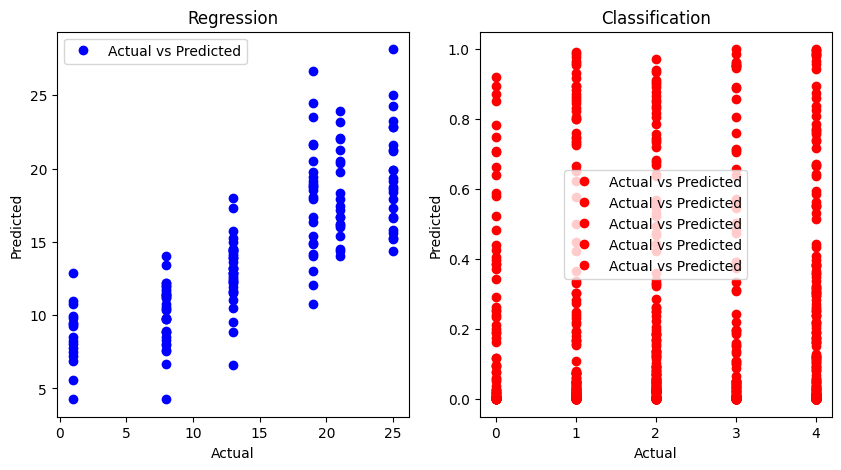

In [108]:
# Plot the actual and predicted values for regression
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(y_test_regression, predictions_regression, 'bo', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression')
plt.legend()

# Plot the actual and predicted categories for classification
# Replace predictions_classification with the appropriate format of your predictions
plt.subplot(1, 2, 2)
plt.plot(y_test_classification, predictions_classification, 'ro', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Classification')
plt.legend()

plt.show()

In [140]:
predictions_classification

array([[8.49368889e-03, 3.54530126e-01, 3.61312151e-01, 2.20811918e-01,
        5.48521243e-02],
       [5.90515882e-03, 8.47339988e-01, 9.18599367e-02, 4.30557728e-02,
        1.18391020e-02],
       [3.07114748e-03, 3.31020087e-01, 4.11972880e-01, 1.19890474e-01,
        1.34045407e-01],
       [1.73813961e-02, 5.29940069e-01, 3.14203769e-01, 9.84315202e-02,
        4.00433578e-02],
       [1.74201265e-01, 1.16522491e-01, 7.01667666e-01, 1.50290201e-03,
        6.10562554e-03],
       [1.74577651e-03, 2.18292639e-01, 5.94292700e-01, 4.93104421e-02,
        1.36358500e-01],
       [3.57591361e-01, 1.20982349e-01, 5.16992450e-01, 1.42966281e-03,
        3.00430460e-03],
       [7.58522365e-05, 4.50269617e-02, 1.42718405e-01, 1.76873684e-01,
        6.35305107e-01],
       [3.23130935e-03, 2.35914677e-01, 4.77697581e-01, 2.13432640e-01,
        6.97237700e-02],
       [3.20330001e-02, 5.48834264e-01, 3.12573582e-01, 9.44022611e-02,
        1.21568777e-02],
       [2.41424050e-03, 1.6592

In [144]:
# Assuming predictions_classification contains the output array you provided
predicted_labels = np.argmax(predictions_classification, axis=1)
predicted_labels

array([2, 1, 2, 1, 2, 2, 2, 4, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 0, 4, 3, 1,
       4, 2, 1, 2, 4, 4, 3, 3, 3, 3, 3, 4, 1, 4, 1, 1, 2, 3, 2, 3, 0, 4,
       4, 4, 1, 1, 4, 1, 2, 4, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 4, 1, 1,
       2, 3, 1, 2, 4, 4, 2, 2, 4, 3, 2, 4, 3, 2, 1, 2, 4, 2, 2, 1, 1, 3,
       4, 2, 2, 2, 1, 1, 1, 2, 3, 4, 2, 2, 3, 1, 2, 2, 1, 2, 3, 4, 1, 4,
       2, 3, 1, 3, 3, 2, 1, 2, 2, 4, 1, 3, 4, 2, 0, 1, 3, 3, 1, 4, 3, 3,
       3, 4, 1, 2, 1, 3, 2, 2, 1, 3, 3, 4, 2, 4, 4, 3, 1, 2, 3, 1, 2, 1,
       1, 2, 3])

In [70]:
import tensorflow
from tensorflow.keras import layers, Model
from tensorflow.keras import backend as K

# Define CNN model
class DepressionCNN(Model):
    def __init__(self):
        super(DepressionCNN, self).__init__()
        self.conv1 = layers.Conv1D(50, 5, activation='relu', padding='same')
        self.conv2 = layers.Conv1D(50, 10, activation='relu', padding='same')
        self.conv3 = layers.Conv1D(50, 15, activation='relu', padding='same')
        self.conv4 = layers.Conv1D(50, 3, activation='relu', padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(150, activation='relu')
        self.fc2 = layers.Dense(1)  # Output layer

    def call(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x4 = self.conv4(tf.concat([x1, x2, x3], axis=-1))  # Concatenate outputs of first three conv layers
        x = self.flatten(x4)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = DepressionCNN()

# Define custom metric function for RMSE
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compile the model with custom metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[root_mean_squared_error])
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


Epoch 1/10
20/20 [==============================] - 2s 39ms/step - loss: 62.5541 - root_mean_squared_error: 7.6612 - val_loss: 42.1604 - val_root_mean_squared_error: 6.4659
Epoch 2/10
20/20 [==============================] - 1s 30ms/step - loss: 23.3364 - root_mean_squared_error: 4.7360 - val_loss: 29.7238 - val_root_mean_squared_error: 5.4311
Epoch 3/10
20/20 [==============================] - 1s 30ms/step - loss: 11.9543 - root_mean_squared_error: 3.4302 - val_loss: 30.5268 - val_root_mean_squared_error: 5.5248
Epoch 4/10
20/20 [==============================] - 1s 30ms/step - loss: 5.8845 - root_mean_squared_error: 2.3757 - val_loss: 19.1090 - val_root_mean_squared_error: 4.3663
Epoch 5/10
20/20 [==============================] - 1s 30ms/step - loss: 3.1724 - root_mean_squared_error: 1.7262 - val_loss: 20.4216 - val_root_mean_squared_error: 4.5181
Epoch 6/10
20/20 [==============================] - 1s 30ms/step - loss: 1.2191 - root_mean_squared_error: 1.0987 - val_loss: 18.4075 - v

In [54]:
model.summary()

Model: "depression_cnn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          multiple                  9550      
                                                                 
 conv1d_34 (Conv1D)          multiple                  19050     
                                                                 
 conv1d_35 (Conv1D)          multiple                  28550     
                                                                 
 conv1d_36 (Conv1D)          multiple                  22550     
                                                                 
 flatten_9 (Flatten)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  750150    
                                                                 
 dense_12 (Dense)            multiple             